Next steps:
- Follow [supervised learning](https://jakevdp.github.io/blog/2014/06/10/is-seattle-really-seeing-an-uptick-in-cycling/)
- Follow [unsupervised learning](https://jakevdp.github.io/blog/2015/07/23/learning-seattles-work-habits-from-bicycle-counts/)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import numpy as np
import pandas as pd

In [2]:
# Load data

from seattlecycling.data import get_fremont_data
data = get_fremont_data()
data = data.loc['1 Oct 2012':'14 May 2014']
data.head()

,total,west,east
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [3]:
# Resample data into daily and weekly totals

daily = data.resample('d').sum()
weekly = data.resample('w').sum()

Text(0, 0.5, 'Weekly rides')

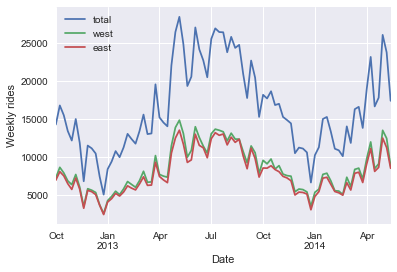

In [4]:
# A first look at the data

weekly.plot();
plt.ylabel('Weekly rides')

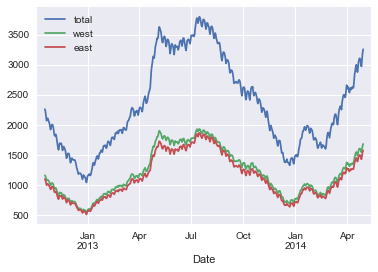

In [5]:
# Look at rolling weekly mean to smooth out short-term variation

data.resample('d').sum().rolling(30, center=True).mean().plot();

Blog post points out that 2014 has seen increased cycle traffic across the bridge. Below we're modelling seasonal variation based on what we think influences peoples' decision whether or not to ride a bike.

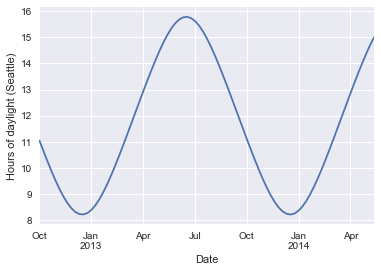

In [6]:
# Hours of daylight

from seattlecycling.tools import hours_of_daylight

weekly['daylight'] = list(map(hours_of_daylight, weekly.index))

weekly['daylight'].plot()
plt.ylabel('Hours of daylight (Seattle)');

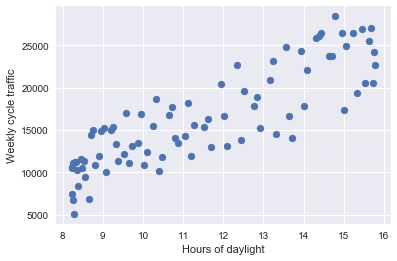

In [8]:
# Relationship between daylight and cycle traffic

plt.scatter(weekly.daylight, weekly.total)
plt.xlabel('Hours of daylight')
plt.ylabel('Weekly cycle traffic');

In [62]:
LinearRegression.fit?

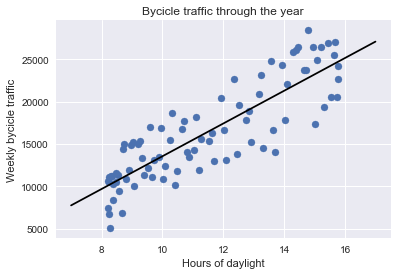

In [34]:
# Adding a linear trend

from sklearn.linear_model import LinearRegression

X = weekly[['daylight']]
y = weekly['total']
clf = LinearRegression(fit_intercept=True).fit(X, y)

xfit = np.linspace(7, 17)
yfit = clf.predict(xfit[:, None])

plt.scatter(weekly.daylight, weekly.total)
plt.plot(xfit, yfit, '-k')
plt.title('Bycicle traffic through the year')
plt.xlabel('Hours of daylight')
plt.ylabel('Weekly bycicle traffic');

In [43]:
clf.coef_[0]

1931.201014112695

Coefficient tells us that according to this model, each additional hour of daylight leads to an additional 2000 riders across the bridge.

In [ ]:
trend = clf.predict(weekly[['daylight']].values)
plt.scatter(weekly.daylight, weekly.total - trend + np.mean(trend))